In [64]:
# [Preprocessing Functions]

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df.Cabin.str[0]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        print(le.classes_)
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

def get_clf_eval(y_test, pred):
    # 정확도, 정밀도, 민감도(재현율), 
    from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)

    print(f"Confusion Matrix\n{confusion}")
    print(f"accuracy: {accuracy: .4f}", end=' ')
    print(f"precision: {precision: .4f}", end=' ')
    print(f"recall: {recall: .4f}\n")




In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 실행 과정

# [파일 호출]
df = pd.read_csv("C:/Users/js2-3/Desktop/data/titanic/train.csv")

# [데이터 전처리]
y = df.Survived
x = df.drop(columns=['Survived'])
x = transform_features(x)  # 전처리 함수 호출
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)



['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['female' 'male']
['C' 'N' 'Q' 'S']


In [66]:
from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# dt_clf = DecisionTreeClassifier(random_state=11)
# rf_clf = RandomForestClassifier(random_state=11)


lr_clf = LogisticRegression(max_iter=150)
lr_clf.fit(X_train, y_train)
pred_lr = lr_clf.predict(X_test)
get_clf_eval(y_test, pred_lr)

Confusion Matrix
[[104  14]
 [ 13  48]]
accuracy:  0.8492 precision:  0.7742 recall:  0.7869



In [67]:
pred_proba = lr_clf.predict_proba(X_test)

In [68]:
pred_lr

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [69]:
pred_proba

array([[0.46203017, 0.53796983],
       [0.87872733, 0.12127267],
       [0.87717511, 0.12282489],
       [0.88251544, 0.11748456],
       [0.85526601, 0.14473399],
       [0.88216984, 0.11783016],
       [0.88846031, 0.11153969],
       [0.20877482, 0.79122518],
       [0.78289495, 0.21710505],
       [0.36914729, 0.63085271],
       [0.89973075, 0.10026925],
       [0.87508071, 0.12491929],
       [0.87716914, 0.12283086],
       [0.88841448, 0.11158552],
       [0.43698012, 0.56301988],
       [0.85905344, 0.14094656],
       [0.90373136, 0.09626864],
       [0.73345034, 0.26654966],
       [0.72478645, 0.27521355],
       [0.17162115, 0.82837885],
       [0.75361145, 0.24638855],
       [0.61897074, 0.38102926],
       [0.85469626, 0.14530374],
       [0.8146844 , 0.1853156 ],
       [0.88804438, 0.11195562],
       [0.76550859, 0.23449141],
       [0.8596044 , 0.1403956 ],
       [0.92580965, 0.07419035],
       [0.71963478, 0.28036522],
       [0.69554739, 0.30445261],
       [0.

In [70]:
import numpy as np

np.concatenate([pred_lr.reshape(-1, 1), pred_proba], axis=1)

array([[1.        , 0.46203017, 0.53796983],
       [0.        , 0.87872733, 0.12127267],
       [0.        , 0.87717511, 0.12282489],
       [0.        , 0.88251544, 0.11748456],
       [0.        , 0.85526601, 0.14473399],
       [0.        , 0.88216984, 0.11783016],
       [0.        , 0.88846031, 0.11153969],
       [1.        , 0.20877482, 0.79122518],
       [0.        , 0.78289495, 0.21710505],
       [1.        , 0.36914729, 0.63085271],
       [0.        , 0.89973075, 0.10026925],
       [0.        , 0.87508071, 0.12491929],
       [0.        , 0.87716914, 0.12283086],
       [0.        , 0.88841448, 0.11158552],
       [1.        , 0.43698012, 0.56301988],
       [0.        , 0.85905344, 0.14094656],
       [0.        , 0.90373136, 0.09626864],
       [0.        , 0.73345034, 0.26654966],
       [0.        , 0.72478645, 0.27521355],
       [1.        , 0.17162115, 0.82837885],
       [0.        , 0.75361145, 0.24638855],
       [0.        , 0.61897074, 0.38102926],
       [0.

In [134]:
custom_threshold = 0.51
pred_proba_1 = pred_proba[ : , 1]

from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=custom_threshold)
# threshold 값이 증가 -> 정밀도 증가, 민감도(재현율) 감소
pred_lr = binarizer.fit_transform(pred_proba_1.reshape(-1, 1))

get_clf_eval(y_test, pred_lr)


Confusion Matrix
[[106  12]
 [ 13  48]]
accuracy:  0.8603 precision:  0.8000 recall:  0.7869



In [72]:
custom_thresholds = [0.4, 0.5, 0.6]

def get_eval_by_threshold(y_test, pred_proba_1, custom_thresholds):
    for custom_threshold in custom_thresholds:
        binarizer = Binarizer(threshold=custom_threshold)
        custom_pred = binarizer.fit_transform(pred_proba_1)
        print(f"임계값: {custom_threshold}")
        get_clf_eval(y_test, custom_pred)

get_eval_by_threshold(y_test, pred_proba_1.reshape(-1,1), custom_thresholds)

임계값: 0.4
Confusion Matrix
[[98 20]
 [10 51]]
accuracy:  0.8324 precision:  0.7183 recall:  0.8361

임계값: 0.5
Confusion Matrix
[[104  14]
 [ 13  48]]
accuracy:  0.8492 precision:  0.7742 recall:  0.7869

임계값: 0.6
Confusion Matrix
[[112   6]
 [ 16  45]]
accuracy:  0.8771 precision:  0.8824 recall:  0.7377



In [129]:
# 그래프를 그리기 위한 수치 값 출력
from sklearn.metrics import precision_recall_curve

predict_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, predict_proba_c1)


-0.036046580295313456 1.0127265645417465


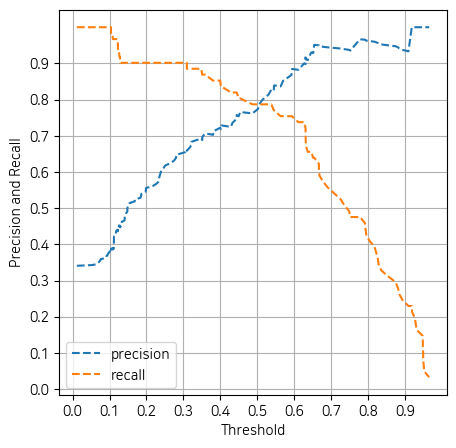

In [130]:
import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker

# 크기 조정
plt.figure(figsize= (5, 5))

# 그래프 1, 2 그리기
plt.plot(thresholds, precision[: -1], linestyle='--', label='precision')
plt.plot(thresholds, recall[: -1], linestyle='--', label='recall')

# x축, y축 값 표시
start, end = plt.xlim()
plt.xticks(np.round(np.arange(0, 1, 0.1), 1))
plt.yticks(np.round(np.arange(0, 1, 0.1), 1))

# x축, y축 Label 표시
plt.xlabel('Threshold')
plt.ylabel('Precision and Recall')
plt.legend()



print(start, end)
plt.grid()

In [131]:
def precision_recall_curve_plot(y_test, predict_proba_c1):
    import matplotlib.pyplot as plt
    # import matplotlib.ticker as ticker

    # 크기 조정
    plt.figure(figsize= (5, 5))

    # 그래프 1, 2 그리기
    plt.plot(thresholds, precision[: -1], linestyle='--', label='precision')
    plt.plot(thresholds, recall[: -1], linestyle='--', label='recall')

    # x축, y축 값 표시
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(0, 1, 0.1), 1))
    plt.yticks(np.round(np.arange(0, 1, 0.1), 1))

    # x축, y축 Label 표시
    plt.xlabel('Threshold')
    plt.ylabel('Precision and Recall')
    plt.legend()



    print(start, end)
    plt.grid()

-0.036046580295313456 1.0127265645417465


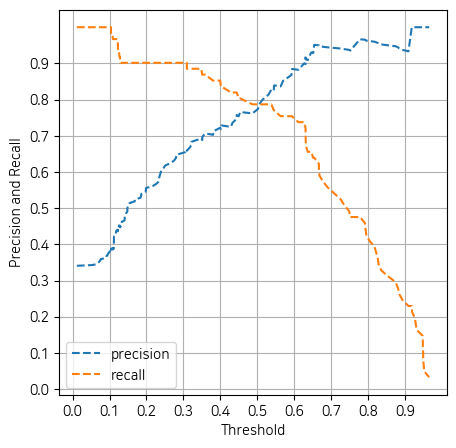

In [133]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [151]:
# f1 score 출력

def get_clf_eval(y_test, pred, pred_proba=None):
    # 정확도, 정밀도, 민감도(재현율), 
    from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auroc = roc_auc_score(y_test, pred_proba)

    print(f"Confusion Matrix\n{confusion}")
    print(f"accuracy:{accuracy: .4f}", end=' ')
    print(f"precision:{precision: .4f}", end=' ')
    print(f"recall:{recall: .4f}", end=' ')
    print(f"f1 score:{f1: .4f}", end=' ')
    print(f"AUROC:{auroc: .4f}\n")

# get_clf_eval(y_test, pred=pred_lr)


In [199]:
def get_eval_by_threshold(y_test, pred_proba_1, custom_thresholds):
    for custom_threshold in custom_thresholds:
        binarizer = Binarizer(threshold=custom_threshold)
        custom_pred = binarizer.fit_transform(pred_proba_1)
        print(f"임계값: {custom_threshold}")
        get_clf_eval(y_test, custom_pred, pred_proba_1)

In [200]:
custom_thresholds = [0.4, 0.5, 0.6]

get_eval_by_threshold(y_test, pred_proba_1.reshape(-1,1), custom_thresholds)

임계값: 0.4
Confusion Matrix
[[98 20]
 [10 51]]
accuracy: 0.8324 precision: 0.7183 recall: 0.8361 f1 score: 0.7727 AUROC: 0.9024

임계값: 0.5
Confusion Matrix
[[104  14]
 [ 13  48]]
accuracy: 0.8492 precision: 0.7742 recall: 0.7869 f1 score: 0.7805 AUROC: 0.9024

임계값: 0.6
Confusion Matrix
[[112   6]
 [ 16  45]]
accuracy: 0.8771 precision: 0.8824 recall: 0.7377 f1 score: 0.8036 AUROC: 0.9024

